> This material is adapted from the [IPython Cookbook](http://ipython-books.github.io/), by Cyrille Rossant, Packt Publishing, 2014.


# Exploratory data analysis in Jupyter

We start with three important Python packages
- `matplotlib` is the standard Python package for plotting, "grandfather of Python visualization packages"
- `numpy` is the fundamental package for scientific computing with Python
- `pandas` is a more recently developed package for data manipulation and analysis 

We will download and process a dataset about attendance on Montreal's bicycle tracks. 

 - The first step is to import the python modules that will be used


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- Location of dataset 

In [3]:
url = "https://github.com/ipython-books/cookbook-data/raw/master/bikes.csv"

- Pandas defines a `read_csv` function that can read any CSV file. By giving the URL to the file, Pandas will automatically download and parse the file, and return a `DataFrame` object. We need to specify a few options to make sure the dates are parsed correctly.

In [4]:
#df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df = pd.read_csv("data/bikes.csv", index_col='Date', parse_dates=True, dayfirst=True)

- The `df` variable now contains a `DataFrame` object, a Pandas data structure that contains 2D tabular data. The `head(n)` method displays the first `n` rows of this table.

In [5]:
df.head(2)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


Every row contains the number of bicycles on every track of the city, for every day of the year.

- get some summary statistics of the table with the `describe` method:

In [6]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


- Pandas has plotting capabilities, which is sort of a layer over matplotlib 
- Let's plot the daily attendance of two tracks. First, we select the two columns `'Berri1'` and `'PierDup'`. Then, we call the `plot` method

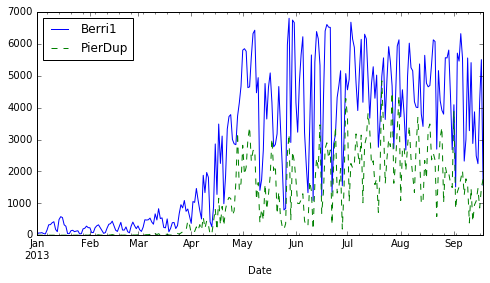

In [7]:
df[['Berri1', 'PierDup']].plot(figsize=(8,4),
                               style=['-', '--']);

- Let's now look at the attendance of all tracks as a function of the weekday. We can get the week day easily with Pandas: the `index` attribute of the `DataFrame` contains the dates of all rows in the table. This index has a few date-related attributes, including `weekday`.

In [8]:
df.index.weekday

array([1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2], dtype=int32)

However, we would like to have names (Monday, Tuesday, etc.) instead of numbers between 0 and 6. This can be done easily. First, we create an array `days` with all weekday names. Then, we index it by `df.index.weekday`. This operation replaces every integer in the index by the corresponding name in `days`. The first element, `Monday`, has index 0, so every 0 in `df.index.weekday` is replaced by `Monday`, and so on. We assign this new index to a new column `Weekday` in the `DataFrame`.

In [9]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
df['Weekday'] = days[df.index.weekday]

- To get the attendance as a function of the weekday, we need to group the table by the weekday. The `groupby` method lets us do just that. Once grouped, we can sum all rows in every group.

In [10]:
df_week = df.groupby('Weekday').sum()

In [11]:
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


- We can now display this information in a figure. We first need to reorder the table by the weekday using `ix` (indexing operation). Then, we plot the table, specifying the line width and the figure size.

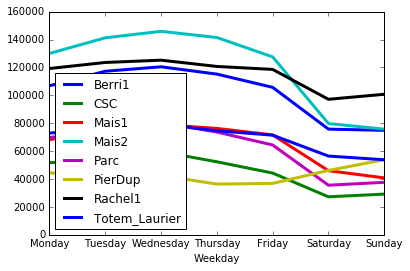

In [12]:
df_week.ix[days].plot(lw=3, figsize=(6,4));
plt.ylim(0);  # Set the bottom axis to 0.

- Finally, let's illustrate interactive capabilities through `widgets`. We plot a *smoothed* version of the track attendance as a function of time (**rolling mean**). The idea is to compute the mean value in the neighborhood of any day. The larger the neighborhood, the smoother the curve. We will create an interactive slider in the notebook to vary this parameter in real-time in the plot.

/Users/ktw/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()


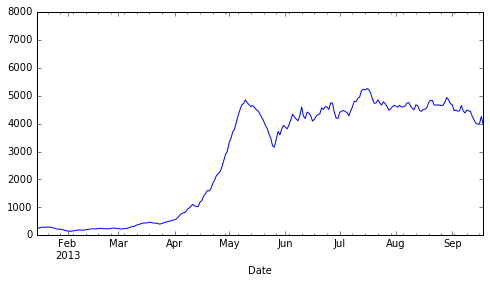

In [13]:
from ipywidgets import interact
#from IPython.html.widgets import interact # IPython < 4.x
@interact
def plot(n=(1, 30)):
    plt.figure(figsize=(8,4));
    pd.rolling_mean(df['Berri1'], n).dropna().plot();
    plt.ylim(0, 8000);
    plt.show();

### <font color="red"> *Exercise* </font>

Create a widget that computes the square of integers between 0 and 10!

## Seaborn

- while `matplotlib` is extremely powerful, it can also be complex. 
- sometimes much effort needed to get good-looking graphs
- `seaborn` is a higher-level visualization package based on `matplotlib`
- default visualization much more appealing compared to `matplotlib`!


We first load the `seaborn` module and import some data 

> Material adapted from http://seaborn.pydata.org/

In [14]:
import seaborn as sns

In [26]:
flights = sns.load_dataset("data/flights",parse_dates=True) #dataset from https://github.com/mwaskom/seaborn-data
#flights = sns.load_dataset("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [27]:
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


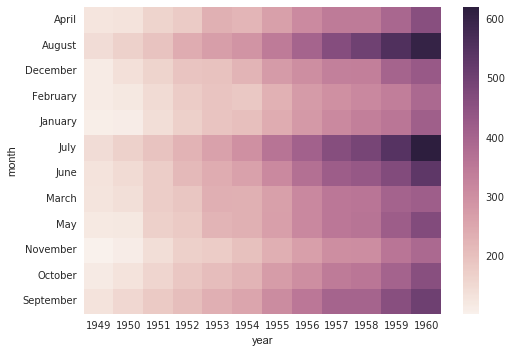

In [24]:
ax = sns.heatmap(flights)

### <font color="red"> *Exercise* </font>

- Annotate each cell with the numeric value using integer formatting!

In [25]:
flights.pivot?

In [22]:
sns.load_dataset?

In [21]:
pd.read_csv?

Plotting a hierarchically clustered heatmap of a pandas DataFrame


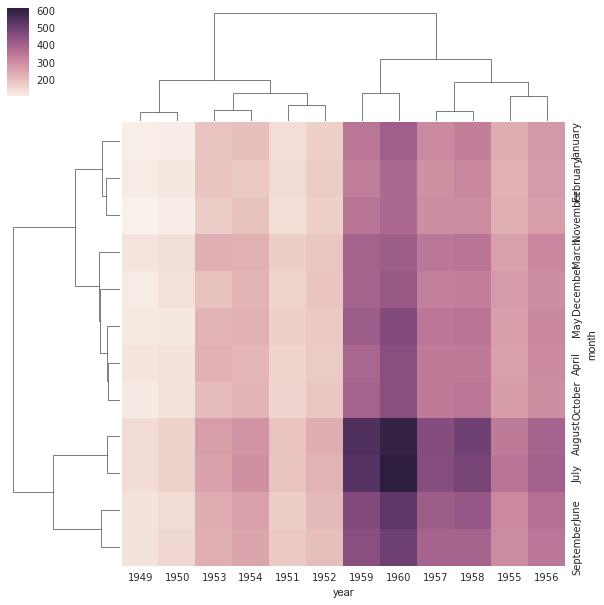

In [19]:
g = sns.clustermap(flights)